In [1]:
!pip install numpy

In [2]:
import numpy as np
import pandas as pd

In [21]:
date = pd.date_range('20180610',periods = 20)
df = pd.DataFrame(np.arange(80).reshape((20,4)),index = date,columns = ['A','B','C','D'])
df.iloc[2,3]=69
df.loc['20180620','C']=69
df.B[df.B>50]=88
df['F']=1
print(df)


             A   B   C   D  F
2018-06-10   0   1   2   3  1
2018-06-11   4   5   6   7  1
2018-06-12   8   9  10  69  1
2018-06-13  12  13  14  15  1
2018-06-14  16  17  18  19  1
2018-06-15  20  21  22  23  1
2018-06-16  24  25  26  27  1
2018-06-17  28  29  30  31  1
2018-06-18  32  33  34  35  1
2018-06-19  36  37  38  39  1
2018-06-20  40  41  69  43  1
2018-06-21  44  45  46  47  1
2018-06-22  48  49  50  51  1
2018-06-23  52  88  54  55  1
2018-06-24  56  88  58  59  1
2018-06-25  60  88  62  63  1
2018-06-26  64  88  66  67  1
2018-06-27  68  88  70  71  1
2018-06-28  72  88  74  75  1
2018-06-29  76  88  78  79  1


In [34]:
date = pd.date_range('20180610',periods = 20)
df = pd.DataFrame(np.arange(80).reshape((20,4)),index = date,columns = ['A','B','C','D'])
df.iloc[0,2]=np.nan
df.iloc[18,0]=np.nan
print(df)
print(df.dropna(axis = 0,how = 'any'))
print(df.dropna(axis = 1,how = 'all'))  #全部為nan才丟
print(df.fillna(value = 99))  #把nan帶入數值
print(df.isnull())  #檢視nan值位置
print(np.any(df.isnull()) == True)  #檢視大表格中是否有nan值,有則顯示True




               A   B     C   D
2018-06-10   0.0   1   NaN   3
2018-06-11   4.0   5   6.0   7
2018-06-12   8.0   9  10.0  11
2018-06-13  12.0  13  14.0  15
2018-06-14  16.0  17  18.0  19
2018-06-15  20.0  21  22.0  23
2018-06-16  24.0  25  26.0  27
2018-06-17  28.0  29  30.0  31
2018-06-18  32.0  33  34.0  35
2018-06-19  36.0  37  38.0  39
2018-06-20  40.0  41  42.0  43
2018-06-21  44.0  45  46.0  47
2018-06-22  48.0  49  50.0  51
2018-06-23  52.0  53  54.0  55
2018-06-24  56.0  57  58.0  59
2018-06-25  60.0  61  62.0  63
2018-06-26  64.0  65  66.0  67
2018-06-27  68.0  69  70.0  71
2018-06-28   NaN  73  74.0  75
2018-06-29  76.0  77  78.0  79
               A   B     C   D
2018-06-11   4.0   5   6.0   7
2018-06-12   8.0   9  10.0  11
2018-06-13  12.0  13  14.0  15
2018-06-14  16.0  17  18.0  19
2018-06-15  20.0  21  22.0  23
2018-06-16  24.0  25  26.0  27
2018-06-17  28.0  29  30.0  31
2018-06-18  32.0  33  34.0  35
2018-06-19  36.0  37  38.0  39
2018-06-20  40.0  41  42.0  43
2018-06-

In [44]:
#concat
df1 = pd.DataFrame(np.ones((3,4))*0,columns = ['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1,columns = ['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2,columns = ['a','b','c','d'])
res = pd.concat([df1,df2,df3],axis = 0)
res = pd.concat([df1,df2,df3],axis = 0,ignore_index = True)  #重新排序


print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [51]:
#join['inner','outer']
df1 = pd.DataFrame(np.ones((3,4))*0,columns = ['a','b','c','d'],index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1,columns = ['c','d','e','f'],index=[2,3,4])
res = pd.concat([df1,df2],join='inner',ignore_index = True)
res = pd.concat([df1,df2],axis=1,join_axes=[df1.index]) #給一個index依循處理

print(res)


     a    b    c    d    c    d    e    f
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0


In [52]:
#append
df1 = pd.DataFrame(np.ones((3,4))*0,columns = ['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1,columns = ['a','b','c','d'])
res = df1.append(df2,ignore_index = True)
print(res)


     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


In [55]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                                  'A': ['A0', 'A1', 'A2', 'A3'],
                                  'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                                    'C': ['C0', 'C1', 'C2', 'C3'],
                                    'D': ['D0', 'D1', 'D2', 'D3']})

res = pd.merge(left, right, on='key')


print(res)

    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2
3  A3  B3  K3  C3  D3


In [57]:
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})

res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
print(res)



   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


In [58]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                                  'B': ['B0', 'B1', 'B2']},
                                  index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                                     'D': ['D0', 'D2', 'D3']},
                                      index=['K0', 'K2', 'K3'])
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')

print(res)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


In [59]:
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

   age_boy   k  age_girl
0        1  K0         4
1        1  K0         5


In [60]:
import matplotlib.pyplot as plt

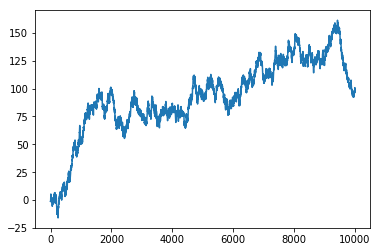

In [67]:
data = pd.Series(np.random.randn(10000),index = np.arange(10000))
data = data.cumsum()
data.plot()
plt.show()


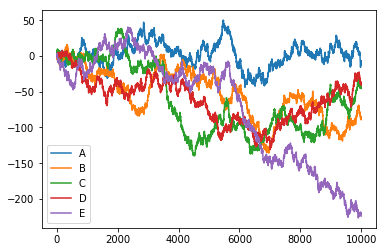

In [68]:
data = pd.DataFrame(np.random.randn(10000,5),index = np.arange(10000),columns = list("ABCDE"))
data = data.cumsum()
data.plot()
plt.show()



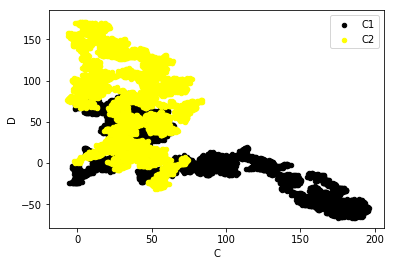

In [69]:
data = pd.DataFrame(np.random.randn(10000,5),index = np.arange(10000),columns = list("ABCDE"))
data = data.cumsum()
ax = data.plot.scatter(x = 'A',y = 'B',color = 'Black',label = 'C1')
data.plot.scatter(x = 'C',y = 'D',color = 'Yellow',label = 'C2',ax = ax)
plt.show()